In [3]:
import os
os.chdir('E:\\SerotinousCones\\ViM')
os.getcwd()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\Imarticus\\PGDA09'

### Import the libraries and read the data in

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The dataset path may be different in your situation. Please use the correct path
df = pd.read_excel("http://khansingh.xyz/Datasets/BikramSr/Concrete_Data.xls")

In [3]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Taking a peek at the relationship between the predicting variables and the response

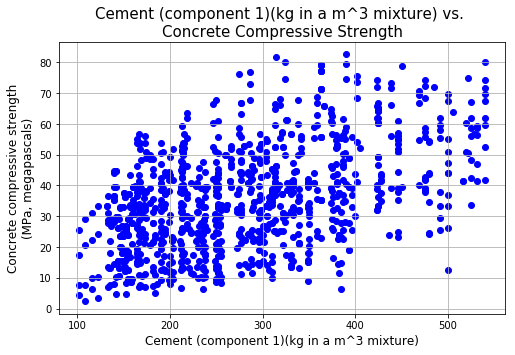

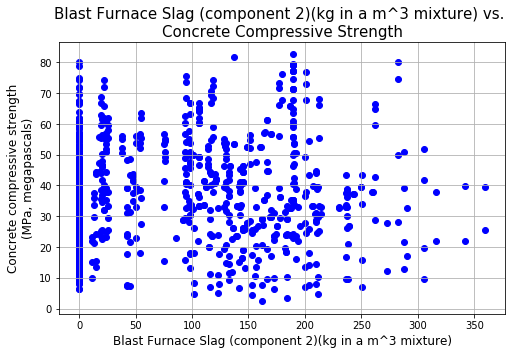

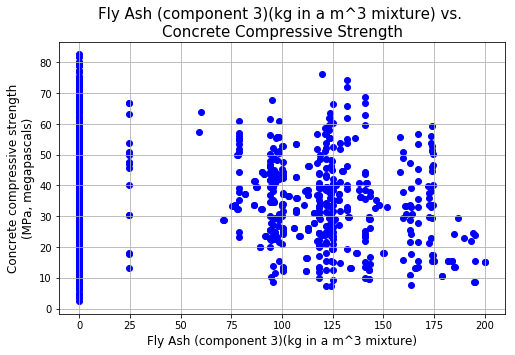

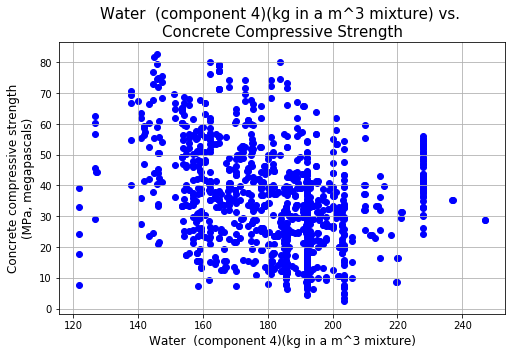

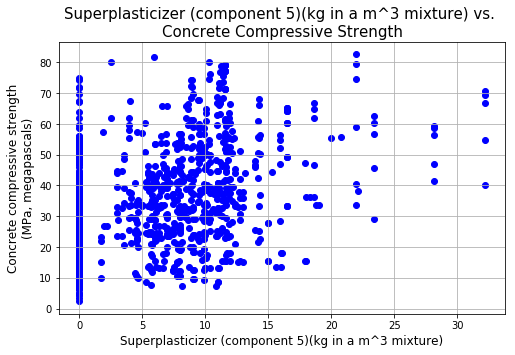

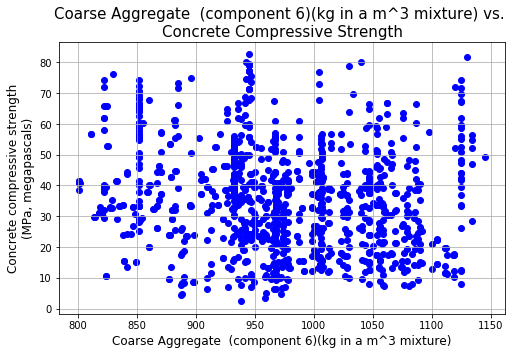

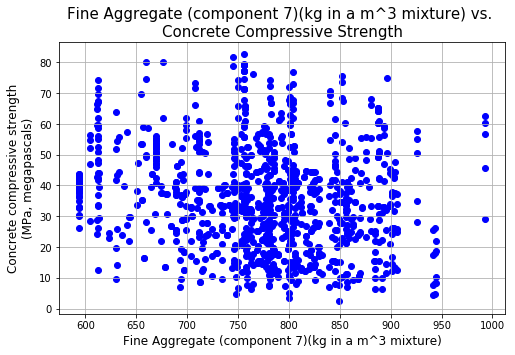

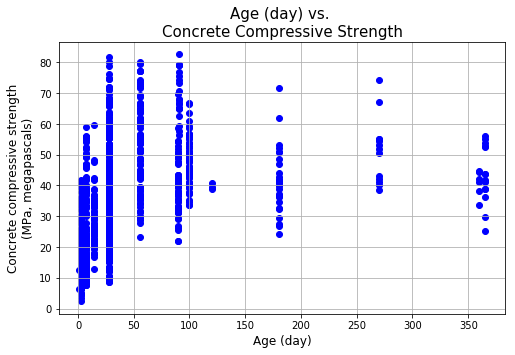

In [8]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nConcrete Compressive Strength".format(c),fontsize=15)
    plt.scatter(x=df[c],y=df['Concrete compressive strength(MPa, megapascals) '],color='blue',edgecolor='b')
    plt.grid(True)
    plt.xlabel(c,fontsize=12)
    plt.ylabel('Concrete compressive strength\n(MPa, megapascals)',fontsize=12)
    plt.show()

### Creating a copy with suitable column names for processing with `statsmodels.OLS()`

In [18]:
df1 = df.copy()

In [19]:
df1.columns=['Component'+str(i) for i in range(1,8)]+['Age']+['y']

In [20]:
df1.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Pairwise scatter plots

In [11]:
from seaborn import pairplot

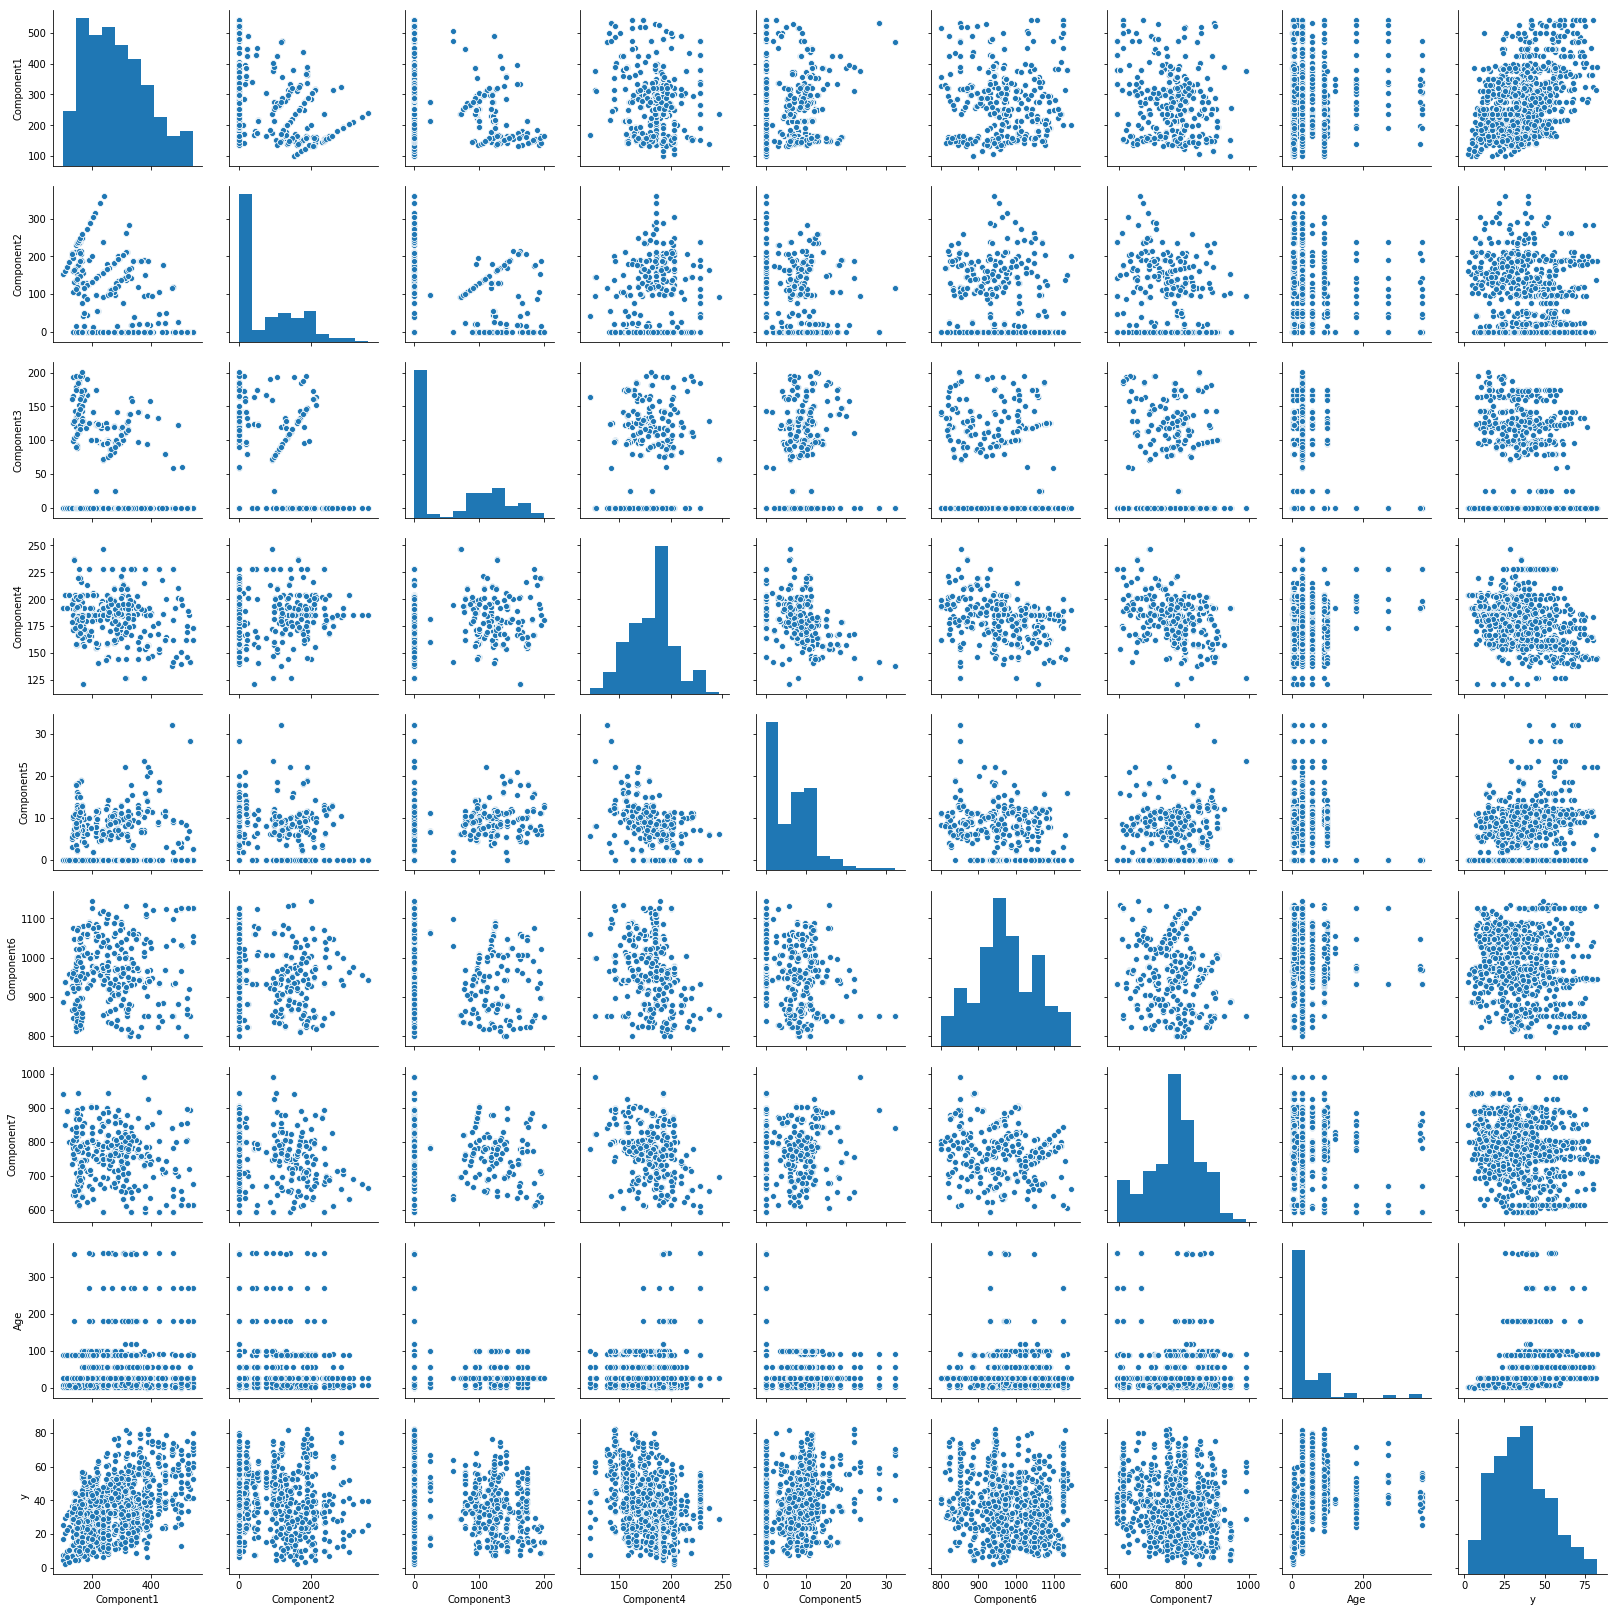

In [12]:
pairplot(df1)

### Correlation matrix and heatmap to visually check for multicollinearity

In [14]:
corr = df1.corr()
corr

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
Component1,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Component2,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Component3,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Component4,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Component5,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Component6,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Component7,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
y,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [21]:
import seaborn as sns

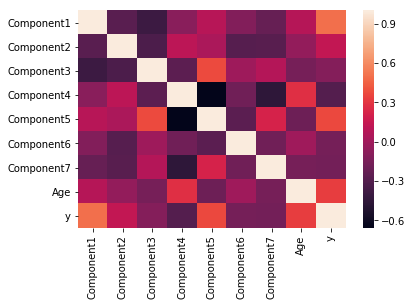

In [22]:
sns.heatmap(df1.corr())

### Construct and fit the model. Print summary of the fitted model

In [23]:
import statsmodels.api as sm

In [24]:
data_ols = sm.add_constant(df1)
data_ols.head(3)

,const,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age,y
0,1.0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,1.0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


In [25]:
X = data_ols.drop('y', axis = 1)
y = data_ols["y"]

In [26]:
model = sm.OLS(y, X)
fitted = model.fit()

In [27]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 27 Jul 2019   Prob (F-statistic):          6.76e-206
Time:                        17:09:36   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1638     26.588     -0.871      0.3

#### Interpreting the above Regression Summary

In [ ]:
# DF Residuals	Degrees of freedom of the residuals. 
    # = (Number of observations - number of parameters)
# DF Model	Number of parameters in the model (not including the constant term if present)

# F-statistic	A measure how significant the fit (i.e. the model) is. 
# The mean squared error of the model divided by the mean squared error of the residuals

# Prob (F-statistic)	The probability that you would get the above statistic, 
# given the null hypothesis that they are unrelated
# The null hypothesis is that the model is not overall significant. Lower it is, better it is

# Log-likelihood	The log of the likelihood function.

# AIC	The Akaike Information Criterion. Adjusts the log-likelihood based on
# the number of observations and the complexity of the model.

# BIC	The Bayesian Information Criterion. Similar to the AIC, but has a higher 
# penalty for models with more parameters.

# The t-statistic value. This is a measure of how statistically significant the coefficient is.
# P > |t|	P-value that the null-hypothesis that the coefficient = 0 is true. 

# If it is less than the confidence level, often 0.05, it indicates that there 
# is a statistically significant relationship between the term and the response.

# Omnibus/Prob(Omnibus) – D'Angostino's test of the skewness and kurtosis of the residual.
# We hope to see Omnibus value close to zero which would indicate normalcy. 
# The Prob (Omnibus) performs a statistical test indicating the probability that 
# the residuals are normally distributed. We hope to see something close to 1 here. 

# Skew – a measure of data symmetry. We want to see something close to zero, 
# indicating the residual distribution is normal. 
# Note that this value also drives the Omnibus.

# Kurtosis – a measure of "peakiness", or curvature of the data. 
# Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a 
# tighter clustering of residuals around zero, implying a better model with few outliers.

# Durbin-Watson – A test for the presence of autocorrelation. 
# We hope to have a value between 1 and 2. 

# Jarque-Bera (JB)/Prob(JB) – like the Omnibus, it also tests both skew and kurtosis. 
# We hope to see in this test a confirmation of the Omnibus test.

# Condition Number: When we have multicollinearity, we can expect much higher 
# fluctuations to small changes in the data, hence, we hope to see a relatively 
# small number, something below 30

# for each coefficient if the t-statistic is large (or simply the p-value is ZERO 
# or very very small < 0.05), that particular coefficient is trustworthy

# The confidence interval [0.025      0.975] is a range within which our coefficient 
# is likely to fall. We can be 95% confident that total_unemployed's coefficient will be within our confidence interval, [-9.185, -7.480].


### A new Result dataframe: p-values and statistical significance of the features 

In [28]:
df_result=pd.DataFrame()

In [30]:
df_result['pvalues']=fitted.pvalues[1:]

In [31]:
df_result.head(3)

,pvalues
Component1,1.962842e-41
Component2,1.633083e-23
Component3,5.029952e-12


In [32]:
df_result['Features']=df.columns[:-1]

In [33]:
df_result

,pvalues,Features
Component1,1.962842e-41,Cement (component 1)(kg in a m^3 mixture)
Component2,1.633083e-23,Blast Furnace Slag (component 2)(kg in a m^3 m...
Component3,5.029952e-12,Fly Ash (component 3)(kg in a m^3 mixture)
Component4,1.937337e-04,Water (component 4)(kg in a m^3 mixture)
Component5,1.920901e-03,Superplasticizer (component 5)(kg in a m^3 mix...
Component6,5.522656e-02,Coarse Aggregate (component 6)(kg in a m^3 mi...
Component7,5.996805e-02,Fine Aggregate (component 7)(kg in a m^3 mixture)
Age,5.841045e-82,Age (day)


In [34]:
df_result.set_index('Features',inplace=True)

In [35]:
df_result

,pvalues
Features,
Cement (component 1)(kg in a m^3 mixture),1.962842e-41
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1.633083e-23
Fly Ash (component 3)(kg in a m^3 mixture),5.029952e-12
Water (component 4)(kg in a m^3 mixture),1.937337e-04
Superplasticizer (component 5)(kg in a m^3 mixture),1.920901e-03
Coarse Aggregate (component 6)(kg in a m^3 mixture),5.522656e-02
Fine Aggregate (component 7)(kg in a m^3 mixture),5.996805e-02
Age (day),5.841045e-82


#### All the predicting variables are statisticall significant with the threshold of p-value <0.01

### Check for Multicollinearity

In [36]:
# Condition number:
np.linalg.cond(fitted.model.exog)

# The condition number is computed by finding the square root of the maximum 
# eigenvalue divided by the minimum eigenvalue of the design matrix. 
# If the condition number is above 30, the regression may have severe multicollinearity

106078.84017463433

In [37]:
fitted.model.exog[1]

array([1.000e+00, 5.400e+02, 0.000e+00, 0.000e+00, 1.620e+02, 2.500e+00,
       1.055e+03, 6.760e+02, 2.800e+01])

In [38]:
X.head(2)

,const,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Age
0,1.0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


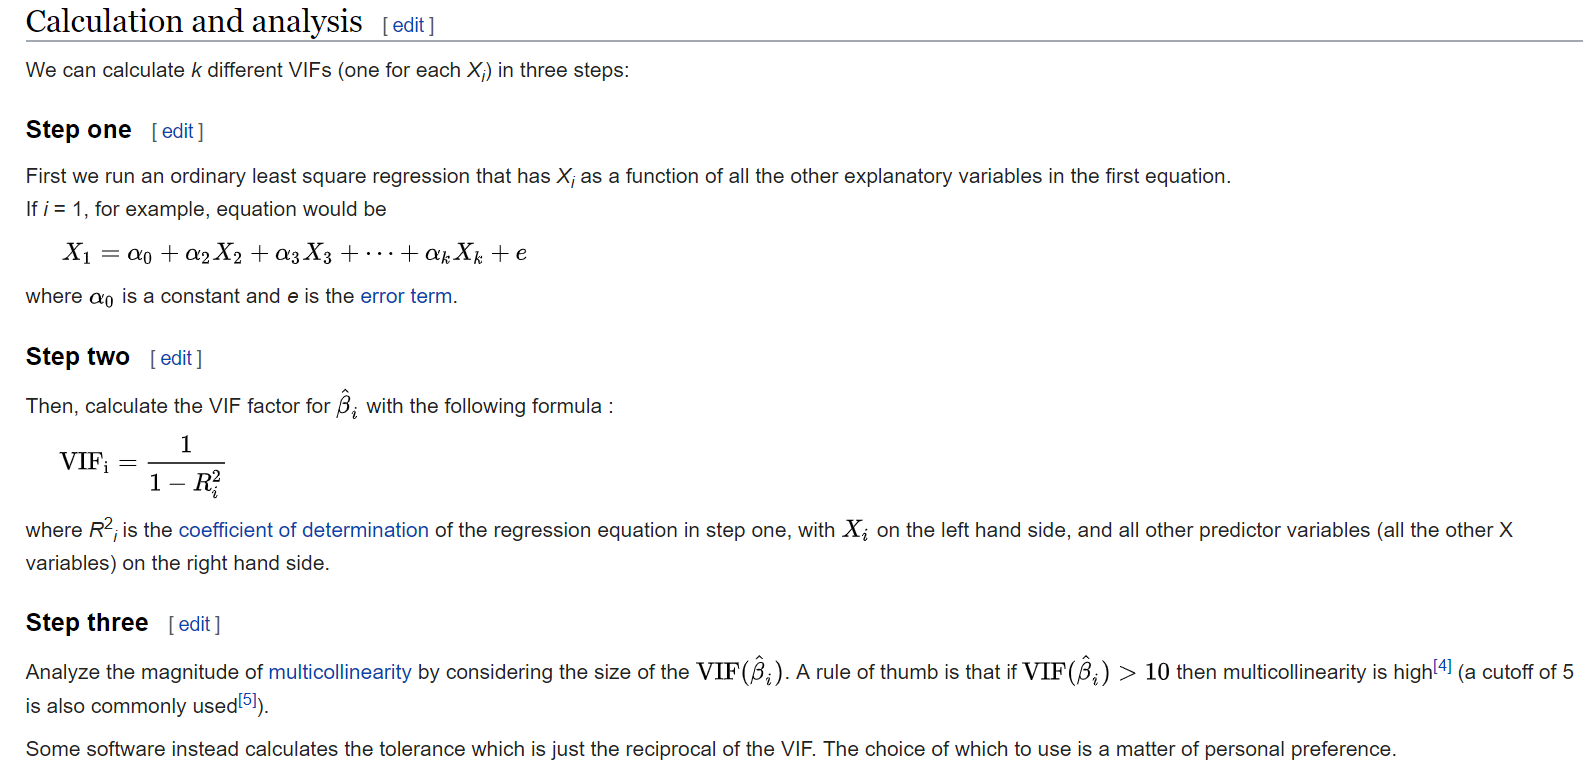

In [119]:
# Variance Inflation Factor (VIF)
from IPython.display import Image
Image('VIF_Calculation.PNG')

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(df1.columns[:-1])):
    v=vif(np.matrix(df1[:]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

Variance inflation factor for Cement (component 1)(kg in a m^3 mixture): 26.25
Variance inflation factor for Blast Furnace Slag (component 2)(kg in a m^3 mixture): 4.44
Variance inflation factor for Fly Ash (component 3)(kg in a m^3 mixture): 4.56
Variance inflation factor for Water  (component 4)(kg in a m^3 mixture): 92.51
Variance inflation factor for Superplasticizer (component 5)(kg in a m^3 mixture): 5.52
Variance inflation factor for Coarse Aggregate  (component 6)(kg in a m^3 mixture): 85.9
Variance inflation factor for Fine Aggregate (component 7)(kg in a m^3 mixture): 73.52
Variance inflation factor for Age (day): 2.43


In [ ]:
# Obviously, our dataset has Multicollinearity issue

## Distribution of the Response Variable

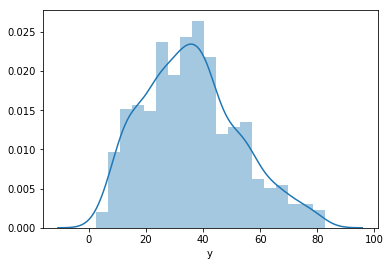

In [63]:
sns.distplot(y)

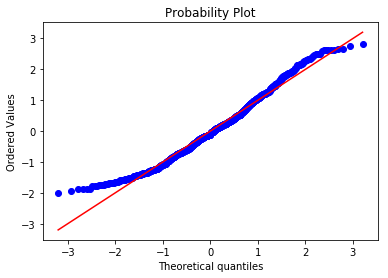

In [64]:
# Recollect that our R-Squared value was close to 0.6, which clearly indicates there is
# a lot of room for improvement of the model

# Notice that the distribution of our Response variable is not fully normal
# Let us do a QQ plot and see
from sklearn import preprocessing
standardized_y = preprocessing.scale(y)
from scipy import stats
qq_plot = stats.probplot(standardized_y, plot=sns.mpl.pyplot)

#### Box-Cox Method

In [40]:
# This is a process by where we find the maximum likelihood estimate of 
# the most appropriate transformation that we should apply to our response value 
# so that our data would be able have a constant variance.
import scipy.stats as stats
transformed_y,fitted_lambda = stats.boxcox(y)

In [41]:
fitted_lambda

0.5792998115011295

In [ ]:
# Implemented using scipy.stats, we got a lambda value of 0.58, 
# which we can use as 0.5 since it won’t make a huge difference in terms of fit, 
# but it will make our answer more interpretable.

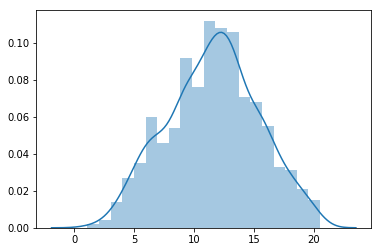

In [70]:
sns.distplot(transformed_y)

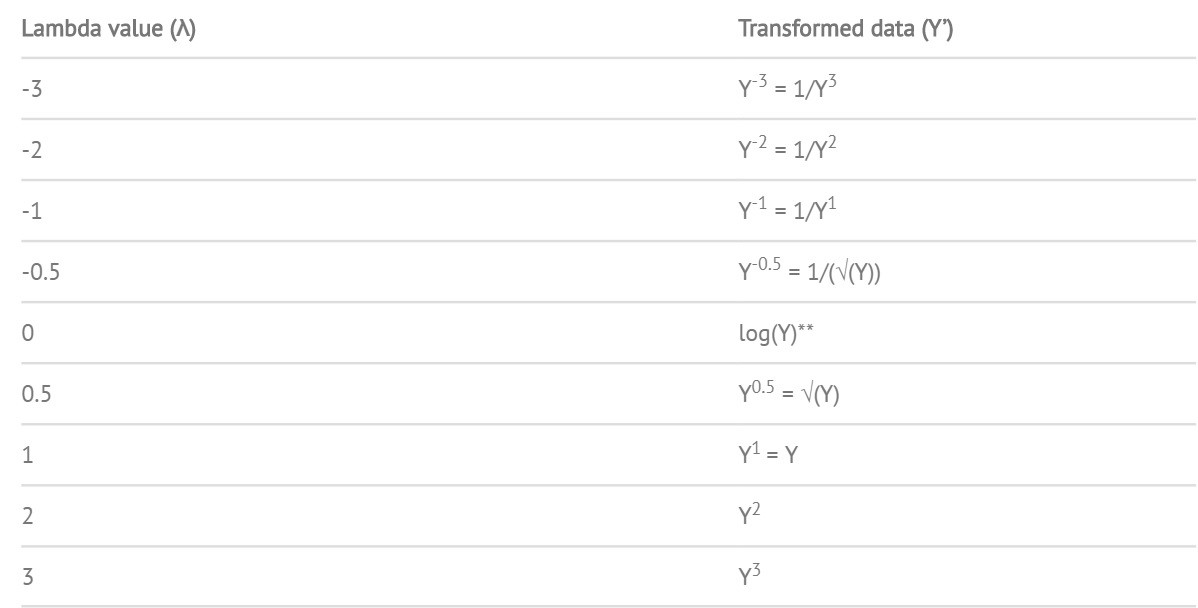

In [139]:
# If you are wondering what transformation Box Cox would have applied, see the table below
Image('Box_Cox_Table.jpeg')

## Residuals Analysis

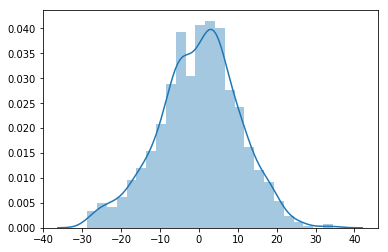

In [71]:
sns.distplot(fitted.resid)

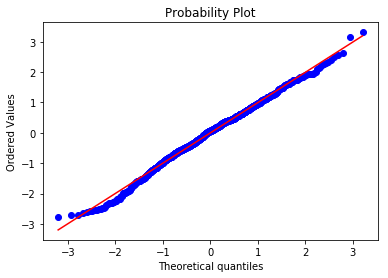

In [117]:
from scipy import stats
qq_plot = stats.probplot(fitted.resid_pearson, plot=sns.mpl.pyplot)

#### Normality test for Residuals

In [84]:
import statsmodels.stats.api as sms
from pandas.compat import lzip

In [85]:
# Jarque-Bera test:

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(fitted.resid)
lzip(name, test)

# Null hypothesis is that the sample comes from a normal distribution

[('Jarque-Bera', 5.3052884520093455),
 ('Chi^2 two-tail prob.', 0.0704646420622437),
 ('Skew', -0.17435746250760145),
 ('Kurtosis', 3.0449029260621905)]

In [ ]:
# P-Value of the test is Less, but not less than 0.01, so we fail to reject the null hypothesis, so NORMAL

In [102]:
# Omni Test

name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(fitted.resid)
lzip(name, test)

# Null hypothesis is that the sample comes from a normal distribution
# The test statistic is based on transformations of skewness and kurtosis

[('Chi^2', 5.379363914421196), ('Two-tail probability', 0.06790253184855022)]

In [ ]:
# P-Value of the test is Less, but not less than 0.01, so we fail to reject the null hypothesis, so NORMAL

In [112]:
# KS Test (Kolmogorov Smirnov test)
# Also known as Lilliefors test

name = ['KS-Stat', 'P-Value']
test = sms.diagnostic.kstest_normal(fitted.resid)
lzip(name, test)

# Null hypothesis is that the sample comes from a normal distribution

[('KS-Stat', 0.03424950313328451), ('P-Value', 0.006359918288505187)]

In [ ]:
# P-Value of the test is Less, a lot less than 0.01, so we reject the null hypothesis, so Not NORMAL

In [158]:
# Anderson-Darling Test

from scipy.stats import anderson
result = anderson(fitted.resid)
print(result)
print("-----------------------------------------------")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
# The test is a modified version of a more sophisticated nonparametric 
# goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

# A feature of the Anderson-Darling test is that it returns a list of critical 
# values rather than a single p-value. This can provide the basis for a more 
# thorough interpretation of the result.

AndersonResult(statistic=1.238953185369155, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
--------------------
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


In [205]:
# Shapiro-Wilk Test

from scipy.stats import shapiro
_,p=shapiro(fitted.resid)
if p<0.01:
    print("The normality assumption may not hold for p value", p)
else:
    print("The residuals seem to come from Gaussian process for p value", p)
    
# Null hypothesis is that the sample comes from a normal distribution

The normality assumption may not hold for p value 0.0029925252310931683


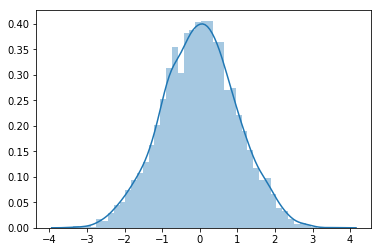

In [214]:
import numpy
mu, sigma = 0, 1
samples = numpy.random.normal(mu, sigma, 5000)
sns.distplot(samples)

In [215]:
_,z=shapiro(samples)
z

0.2352248728275299

In [ ]:
# P-Value of the test is MORE, a lot more than 0.01, so we can NOT reject the null hypothesis, so definitely NORMAL

#### Residuals Plot

In [75]:
pred = fitted.predict(X)

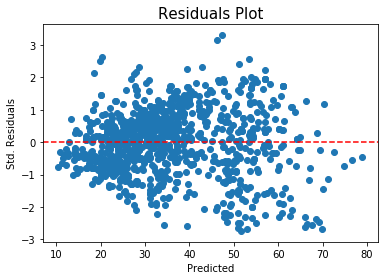

In [146]:
plt.scatter(pred,fitted.resid_pearson)
plt.xlabel("Predicted")
plt.ylabel("Std. Residuals")
plt.title("Residuals Plot",fontsize=15)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# Notice that the Homoschedastic property does not seem to be satisfied

In [101]:
# Breush-Pagan test:

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fitted.resid, fitted.model.exog)
lzip(name, test)

# NULL Hypithesis is that errors are homoscedastic
# Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan

[('Lagrange multiplier statistic', 137.1678773740066),
 ('p-value', 9.204945690605437e-26),
 ('f-value', 19.607325841244243),
 ('f p-value', 1.1361594104656735e-27)]

In [ ]:
# P-Value of the test is very Less, so we reject the null hypothesis in favor of heteroskedasticity

In [110]:
# White’s Lagrange Multiplier Test:

name = ['Lagrange multiplier statistic (LM)', 'p-value of LM',
        'f-value', 'f p-value']
test = sms.het_white(fitted.resid, fitted.model.exog)
lzip(name, test)

# NULL Hypithesis is that errors are homoscedastic

[('Lagrange multiplier statistic (LM)', 289.1493580875428),
 ('p-value of LM', 8.574022288410364e-38),
 ('f-value', 8.737257294748675),
 ('f p-value', 1.039457683570526e-45)]

In [ ]:
# P-Value of the test is very Less, so we reject the null hypothesis in favor of heteroskedasticity

#### Test for Autocorrelation in Residuals

In [105]:
# Breusch-Pagan test for no autocorrelation of residuals

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.acorr_breusch_godfrey(fitted)
lzip(name, test)

# NULL Hypithesis is that errors are Autocorrelated

[('Lagrange multiplier statistic', 274.2690838871468),
 ('p-value', 5.280965381898256e-46),
 ('f-value', 17.28185560176629),
 ('f p-value', 9.073778448417171e-54)]

In [ ]:
# P-Value of the test is very Less, so we reject the null hypothesis in favor of "No Autocorrelation"

#### Linearity Test

In [107]:
# Rainbow test for linearity

name = ['f-value', 'p-value']
test = sms.linear_rainbow(fitted)
lzip(name, test)

# The Null hypothesis is that the regression is correctly modelled as linear.

[('f-value', 1.1617649744716718), ('p-value', 0.045363419902011794)]

In [ ]:
# P-Value of the test is Less, but not less than 0.01, so we fail to reject the null hypothesis in favor of non-linearity

### Residuals vs. predicting variables plots

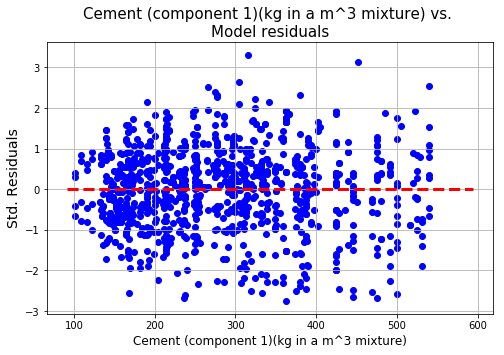

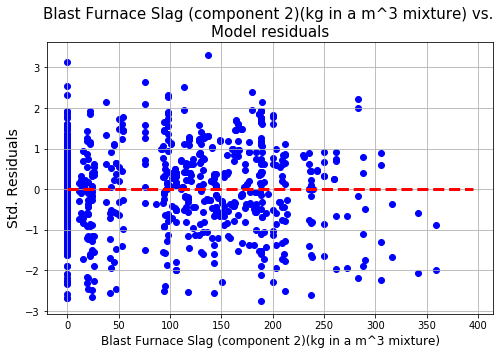

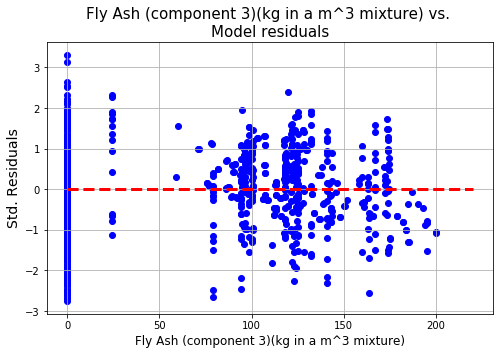

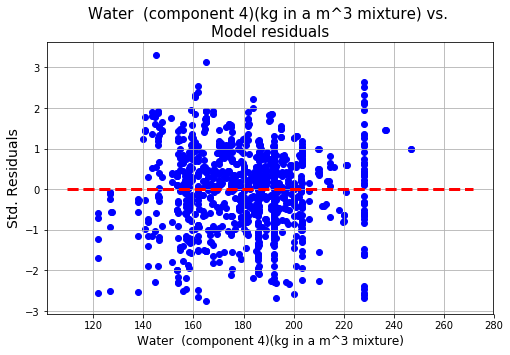

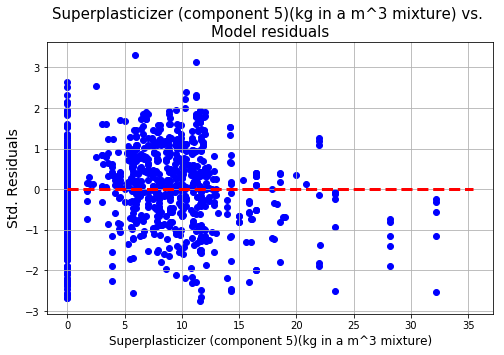

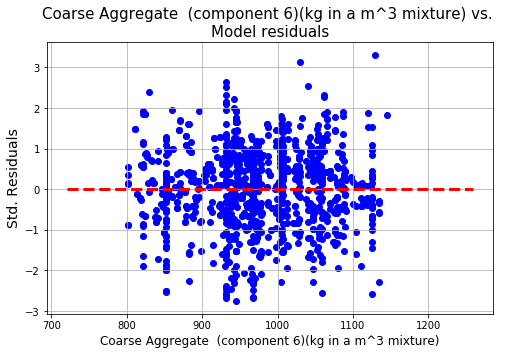

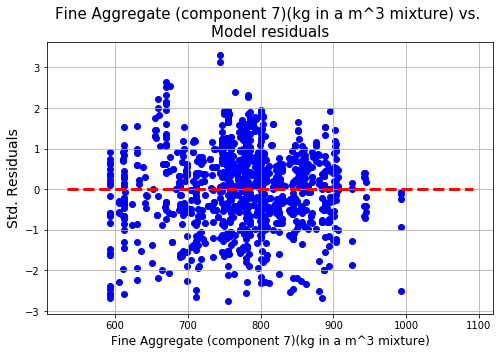

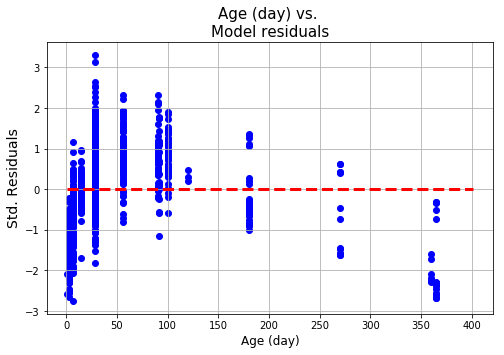

In [145]:
for c in df.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=15)
    plt.scatter(x=df[c],y=fitted.resid_pearson,color='blue',edgecolor='b')
    plt.grid(True)
    xmin=min(df[c])
    xmax = max(df[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=12)
    plt.ylabel('Std. Residuals',fontsize=14)
    plt.show()

#### Residual plots show some bit of clustering but overall the assumptions linearity and independence seem to hold because the distribution seem random around the 0 axis.

### Cook's distance (checking for outliers in residuals)

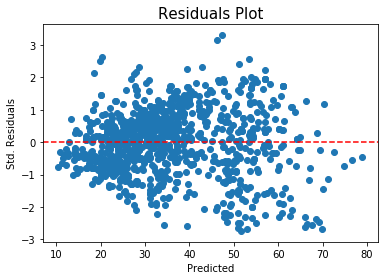

In [159]:
# Let us see the residuals plot one more time
plt.scatter(pred,fitted.resid_pearson)
plt.xlabel("Predicted")
plt.ylabel("Std. Residuals")
plt.title("Residuals Plot",fontsize=15)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# 99% of our data should be between 3 standard deviations

# An observation with a standardized residual above 3 or below -3 is 
# considered to be an outlier in its residual
# i.e., its Y value is unusual given its explanatory variables.  
# It is worth looking further at the observation to see if any reasons 
# for the large magnitude residual can be identified.    

In [162]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
# Influential observation: Point that if it is removed would markedly change 
# the statistical analysis.  For simple linear regression, points that are 
# outliers in the X direction are often influential. 

# Leverage point: Point that is an outlier in the X direction that has the potential to be influential.  
# It will be influential if its residual is of moderately large magnitude. 

# presence of observations with very high leverage won't necessarily indicate 
# that they are effecting the regression at all. On the other hand, 
# presence of values with high Cook Distance, can certainly do.

# Technically, Cook’s D is calculated by removing the ith data point from the model and recalculating the regression. 
# One way to think about whether or not the results you have were driven by a given data point is 
# to calculate how far the predicted values for your data would move if your model were fit 
# without the data point in question. This calculated total distance is called Cook's distance.

# Cook's D is a function of the leverage and standardized residual associated with each data point.

In [163]:
inf=influence(fitted)

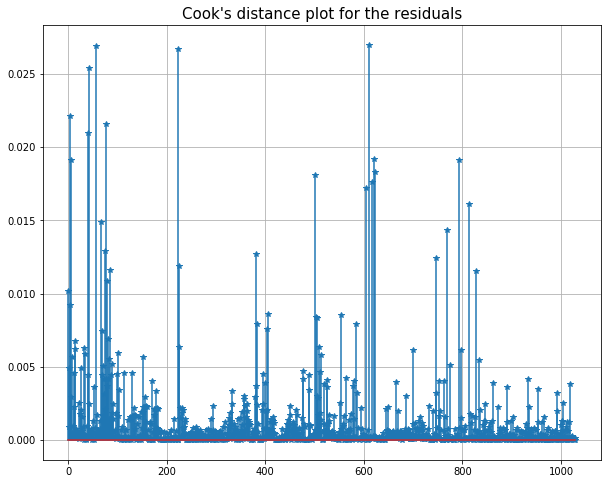

In [173]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(10,8))
plt.title("Cook's distance plot for the residuals",fontsize=15)
plt.stem(np.arange(len(c)), c, markerfmt="*")
plt.grid(True)
plt.show()

#### There are few data points with residuals being possible outliers

In [174]:
# Cook’s distance, Di, is used in Regression Analysis to find influential
# outliers in a set of predictor variables.

# A general rule of thumb is that observations with a Cook’s D of more 
# than 3 times the mean, μ, is a possible outlier.